In [49]:
import os

In [50]:
%pwd

'c:\\Users\\LENOVO\\Desktop\\Hamza Bouajila\\3IDSD SD\\MLOPS'

In [68]:
os.chdir(r"End-to-End-MLOPS")

In [69]:
%pwd

'c:\\Users\\LENOVO\\Desktop\\Hamza Bouajila\\3IDSD SD\\MLOPS\\Projects\\End-to-End-MLOPS'

In [70]:
from dataclasses import dataclass
from pathlib import Path


@dataclass(frozen=True)
class DataTransformationConfig:
    root_dir: Path
    data_path: Path

In [71]:
from mlProject.constants import *
from mlProject.utils.common import read_yaml, create_directories

In [72]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])


    
    def get_data_transformation_config(self) -> DataTransformationConfig:
        config = self.config.data_transformation

        create_directories([config.root_dir])

        data_transformation_config = DataTransformationConfig(
            root_dir=config.root_dir,
            data_path=config.data_path,
        )

        return data_transformation_config

In [73]:
import os
from mlProject import logger
from sklearn.model_selection import train_test_split
import pandas as pd
from imblearn.over_sampling import SVMSMOTE

In [74]:
class DataTransformation:
    def __init__(self, config: DataTransformationConfig):
        self.config = config

    def resampling_data(self):
        data = pd.read_csv(self.config.data_path)
        X = data.drop(columns=['quality'])
        y = data['quality']
        sm = SVMSMOTE()
        X_res, y_res = sm.fit_resample(X, y)
        Resampled_data = pd.concat([X_res, y_res], axis=1)
        Resampled_data.to_csv(os.path.join(self.config.root_dir, "Resampled_data.csv"),index = False)
        logger.info("Resampling data to be balanced")
        logger.info(data.quality.value_counts())
        logger.info(Resampled_data.quality.value_counts())



    def train_test_spliting(self):
        data = pd.read_csv(os.path.join(self.config.root_dir, "Resampled_data.csv"))
        train, test = train_test_split(data)
        
        train.to_csv(os.path.join(self.config.root_dir, "train.csv"),index = False)
        test.to_csv(os.path.join(self.config.root_dir, "test.csv"),index = False)

        logger.info("Splited data into training and test sets")
        logger.info(train.shape)
        logger.info(test.shape)

        print(train.shape)
        print(test.shape)
        

In [75]:
try:
    config = ConfigurationManager()
    data_transformation_config = config.get_data_transformation_config()
    data_transformation = DataTransformation(config=data_transformation_config)
    data_transformation.resampling_data()
    data_transformation.train_test_spliting()
except Exception as e:
    raise e

[2023-11-17 22:19:23,628: INFO: common: yaml file: config\config.yaml loaded successfully]
[2023-11-17 22:19:23,632: INFO: common: yaml file: params.yaml loaded successfully]
[2023-11-17 22:19:23,641: INFO: common: yaml file: schema.yaml loaded successfully]
[2023-11-17 22:19:23,644: INFO: common: created directory at: artifacts]
[2023-11-17 22:19:23,647: INFO: common: created directory at: artifacts/data_transformation]


[2023-11-17 22:19:25,456: INFO: 756797155: Resampling data to be balanced]
[2023-11-17 22:19:25,458: INFO: 756797155: quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64]
[2023-11-17 22:19:25,460: INFO: 756797155: quality
5    681
6    681
7    681
4    426
8    415
3    414
Name: count, dtype: int64]
[2023-11-17 22:19:25,654: INFO: 756797155: Splited data into training and test sets]
[2023-11-17 22:19:25,656: INFO: 756797155: (2473, 12)]
[2023-11-17 22:19:25,658: INFO: 756797155: (825, 12)]
(2473, 12)
(825, 12)


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Hamza Bouajila\3IDSD SD\MLOPS\Projects\End-to-End-MLOPS\artifacts\data_ingestion\winequality-red.csv")
df_res = pd.read_csv(r"C:\Users\LENOVO\Desktop\Hamza Bouajila\3IDSD SD\MLOPS\Projects\End-to-End-MLOPS\artifacts\data_transformation\Resampled_data.csv")

In [77]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [78]:
df_res['quality'].value_counts()

quality
5    681
6    681
7    681
4    426
8    415
3    414
Name: count, dtype: int64

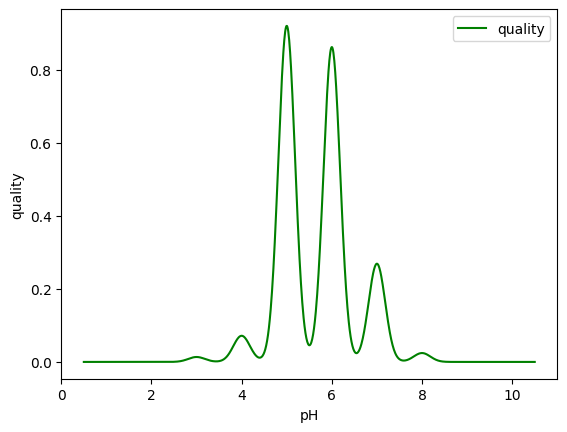

In [25]:
df.plot(kind='kde',x='pH',y='quality',color='green');
plt.ylabel('quality');
plt.xlabel('pH');

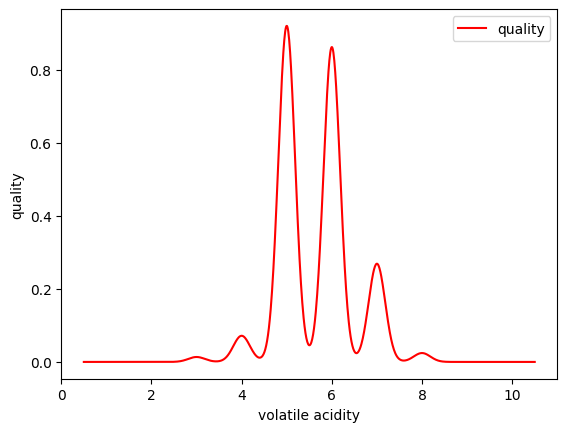

In [22]:
df.plot(kind='kde',x='volatile acidity',y='quality',color='red');
plt.ylabel('quality');
plt.xlabel('volatile acidity');

<Axes: >

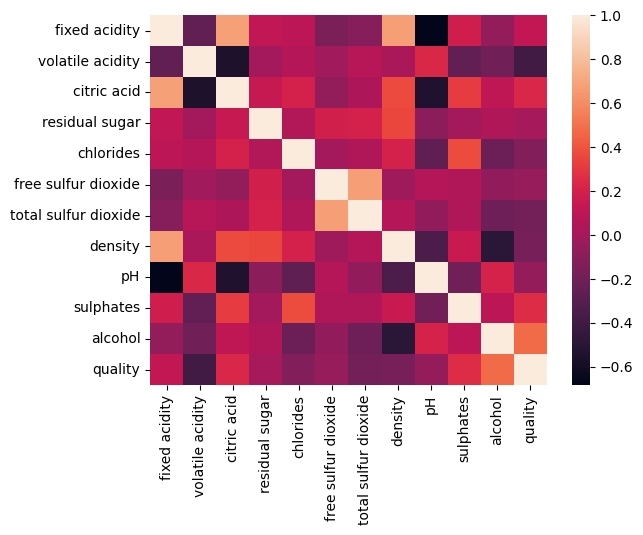

In [30]:
import seaborn as sns
sns.heatmap(df.corr(),annot=False)

<Axes: >

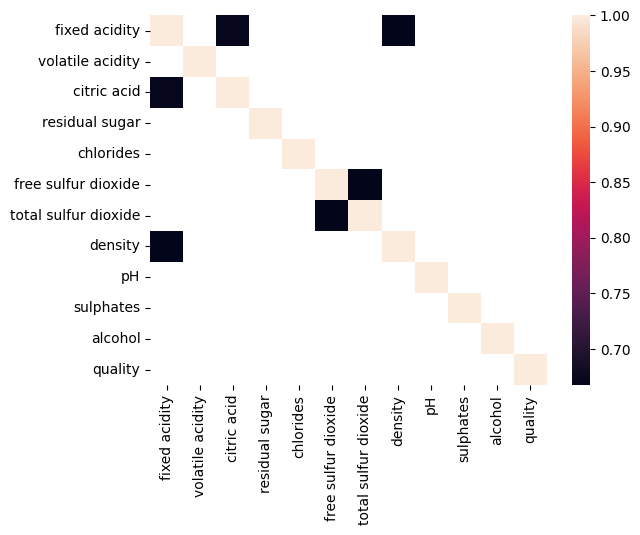

In [33]:
sns.heatmap(df.corr()[df.corr() >= 0.5 ])

<Axes: >

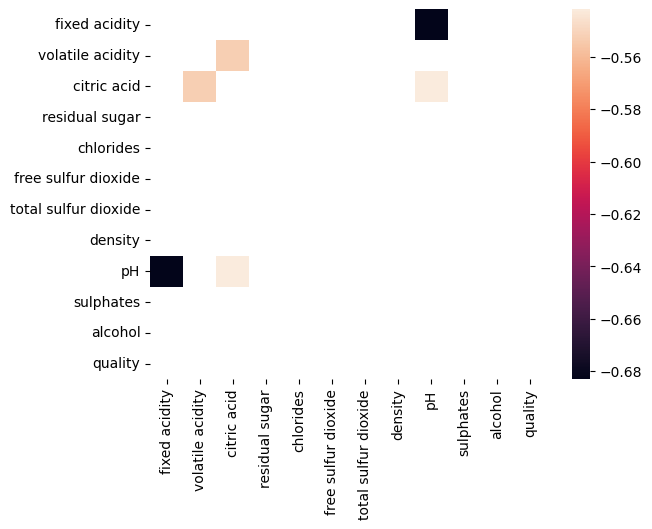

In [35]:
sns.heatmap(df.corr()[df.corr() <= -0.5 ])

array([[<Axes: title={'center': 'quality'}>]], dtype=object)

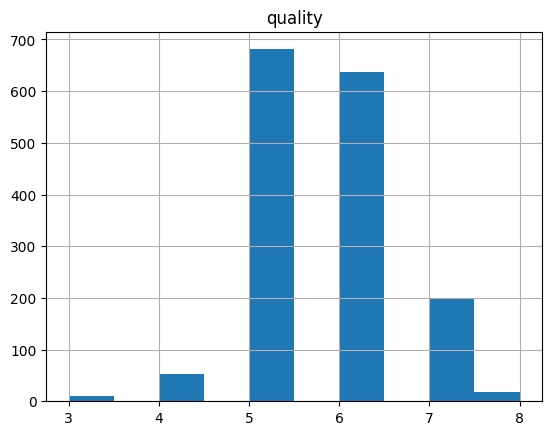

In [37]:
df.hist("quality")

Data is not balanced